<a href="https://colab.research.google.com/github/BadPrograms/ICA/blob/main/ICA_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
import math

import numpy as np


from scipy.special import expit


def ica(data, l_rate=0.001, 
             step=0.8, 
            iter=400,
             return_n_iter=True):
  
    n_samples, n_features = data.shape
    block = int(math.floor(math.sqrt(n_samples / 3.0)))

    nblock = n_samples // block
    lastt = (nblock - 1) * block + 1

    weights = np.identity(n_features)

    BI = block * np.identity(n_features)
    step = 0
    while step <iter:
        print(step)
        # shuffle data at each step
        permute = np.random.permutation(n_samples)

        # ICA training block
        # loop across block samples
        for t in range(0, lastt, block):
            u = np.dot(data[permute[t:t + block], :], weights)

          
            # logistic ICA weights update
            y = expit(u)
            weights += l_rate * np.dot(weights, BI + np.dot(u.T, (1.0 - 2.0 * y)))

        l_rate *= step
        step+=1
        
    # prepare return values
    print(step)
    return weights.T
   

NameError: ignored

In [3]:
import PIL as pil
from google.colab import files
import sys
import io
import wave
uploaded = files.upload()
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from numba import njit

import random
import matplotlib.pyplot as plt

scaler = StandardScaler(with_std=False)
@njit
def logistic(u):
    return 1/(1+np.exp(-u))

In [5]:
from IPython.display import Audio, display
from scipy.io import wavfile as wf

#display(Audio(uploaded["beet.wav"], autoplay=True))


In [6]:
_1,s1=wf.read("beet.wav")

In [7]:
_2,s2=wf.read("beet9.wav")
_3,s3=wf.read("mike.wav")
_4,s4=wf.read("beet92.wav")
_5,s5=wf.read("street.wav")
#_6,s6=wf.read("audio_original_signal0.wav")
print(s3)

[ 0  0  0 ... 15 14 15]


In [93]:


x = np.stack((s2[:150000],s1[:150000],s3[:150000],s4[:150000],s5[:150000]))
x=x/(np.max(np.max(np.abs(x), axis=0)))
A=np.random.uniform(10,size=(5,5))
#A=normalize(a)
print(A)
u=np.dot(A,x)
print(f'Shape of s1: {s1.shape}, s2: {s1.shape}, Linear Mix: {x.shape}')
wf.write('./talk_and_music.wav', _2, x.mean(axis=0).astype(np.float32))
print((np.linalg.inv(A)))

[[3.61580102 8.05862091 6.63167316 5.33346167 6.41500973]
 [5.09686168 8.42195962 6.55238888 6.4908679  6.51013233]
 [2.18819954 9.87881508 5.6837437  1.01414489 8.17237275]
 [1.35753221 6.78668211 9.40272724 7.77239799 9.17729103]
 [2.47092932 9.51998201 9.40240148 9.48102518 4.11990173]]
Shape of s1: (210504,), s2: (210504,), Linear Mix: (5, 150000)
[[ 2.33745694 -0.99204882 -0.53514983 -0.3068417  -0.3269545 ]
 [-1.74831825  0.89309536  0.46040964  0.0532198   0.27919521]
 [ 4.66524639 -2.61820461 -0.90868867 -0.41890728 -0.39131174]
 [-2.87155941  1.60738268  0.45462137  0.32515012  0.30521967]
 [-1.40074338  0.80749644  0.28466818  0.26881968 -0.01567446]]


In [32]:
display(Audio(x[0],rate=_1, autoplay=True))
display(Audio(u[1],rate=_2, autoplay=True))

In [33]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX
def whiten(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened
whit=whiten(u.T)
print(whit.T.shape,u.shape)

(5, 100000) (5, 100000)


In [231]:
a=ica(u.T)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [223]:
display(Audio(u[2],rate=_3, autoplay=True))
print(a)

[[ 1.23190762e+02 -6.93112566e+01 -2.39337267e+01 -1.07600578e+01
  -1.04452001e+01]
 [ 3.47995450e+01 -1.52346850e+01 -7.81776228e+00 -4.59236329e+00
  -4.57039295e+00]
 [ 3.83564180e+01 -2.13813815e+01 -6.20989884e+00 -4.32375350e+00
  -4.01198582e+00]
 [-5.06733171e+01  2.91128403e+01  1.03751591e+01  9.91009212e+00
  -6.98771249e-01]
 [-1.35772732e+01  6.65495868e+00  3.85535981e+00 -7.50767771e-02
   2.71453427e+00]]


[[136.83837859 -76.74497683 -26.6542812  -12.19259193 -11.60005961]
 [ 34.52895001 -15.152576    -7.81007457  -4.46854478  -4.54232954]
 [ 38.80515139 -21.76380461  -6.28632074  -4.26585628  -4.00971915]
 [-48.94147736  28.08661487  10.03030338   9.80084087  -0.77966945]
 [-20.48647375  10.76238352   5.15075321   0.71185513   3.07464578]]


[[  0.08216782  -0.10679637  29.39633315  -0.09669627   0.68478303]
 [ 13.23925838  -0.08243552   0.58336471   0.08766589  -0.69165264]
 [ -0.06988983   0.19725597   1.19666143 -11.84761415   0.20736579]
 [ -0.48229837   0.3237881    1.30408302   0.23516425  37.59191181]
 [  0.61384192  10.53267915  -0.46228128   0.50061261  -0.06237207]]


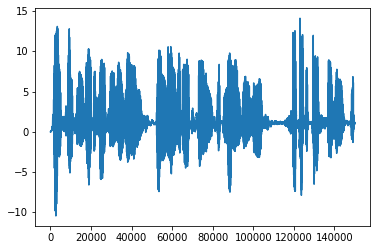

In [237]:

print(a)
b=np.dot(a,u)
plt.plot(b[0])
#plt.plot(u[0])
#plt.plot(x[0])
display(Audio(b[4],rate=_3, autoplay=True))
print(np.dot(a,A))